In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import os
import pandas as pd
from google.colab import drive
# 1. Mount Google Drive
# This step will prompt you to authorize Google Colab to access your Google Drive.
print("Mounting Google Drive...")
drive.mount('/content/drive/')
print("Google Drive mounted successfully!")

Mounting Google Drive...
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Google Drive mounted successfully!


In [2]:
# 2. Define the path to your CSV files
csv_folder_path = '/content/drive/My Drive/LSTM_results'

In [3]:
# Check if the folder exists
if not os.path.exists(csv_folder_path):
    print(f"Error: Folder not found at '{csv_folder_path}'")
    print("Please make sure the folder name is correct and it exists in your Google Drive.")
else:
    print(f"Accessing folder: {csv_folder_path}")

    # 3. List all CSV files in the specified folder
    csv_files = [f for f in os.listdir(csv_folder_path) if f.endswith('.csv')]

    if not csv_files:
        print(f"No CSV files found in '{csv_folder_path}'. Please check the folder content.")
    else:
        print(f"Found {len(csv_files)} CSV files:")
        for f in csv_files:
            print(f"- {f}")

        # 4. Initialize an empty list to store DataFrames
        all_dfs = []

        # 5. Loop through each CSV file, read it into a DataFrame, and append to the list
        print("\nReading and appending CSV files...")
        for csv_file in csv_files:
            file_path = os.path.join(csv_folder_path, csv_file)
            try:
                df = pd.read_csv(file_path)
                all_dfs.append(df)
                print(f"Successfully read: {csv_file}")
            except Exception as e:
                print(f"Error reading {csv_file}: {e}")

        # 6. Concatenate all DataFrames into a single DataFrame
        if all_dfs:
            try:
                combined_df = pd.concat(all_dfs, ignore_index=True)
                print("\nAll CSV files successfully combined into one DataFrame!")
                print("\nCombined DataFrame Info:")
                combined_df.info()
                print("\nFirst 5 rows of the combined DataFrame:")
                print(combined_df.head())
                print(f"\nTotal rows in combined DataFrame: {len(combined_df)}")
            except Exception as e:
                print(f"Error concatenating DataFrames: {e}")
        else:
            print("No DataFrames were successfully read to combine.")

# Optional: Save the combined DataFrame to a new CSV file in your Google Drive
# output_path = '/content/drive/My Drive/combined_data.csv'
# if 'combined_df' in locals(): # Check if combined_df was created
#     try:
#         combined_df.to_csv(output_path, index=False)
#         print(f"\nCombined DataFrame saved to: {output_path}")
#     except Exception as e:
#         print(f"Error saving combined DataFrame: {e}")

Accessing folder: /content/drive/My Drive/LSTM_results
Found 74 CSV files:
- 12305000_result_df_202505221324.csv
- 12305000_result_df_202505221328.csv
- 12305000_result_df_202505221332.csv
- 12305000_result_df_202505221334.csv
- 12305000_result_df_202505221407.csv
- 12305000_result_df_202505221413.csv
- 12305000_result_df_202505222132.csv
- 12305000_result_df_202505222135.csv
- 12305000_result_df_202505222142.csv
- 12305000_result_df_202505222147.csv
- 12305000_result_df_202505222153.csv
- 12305000_result_df_202505222158.csv
- 12305000_result_df_202505222204.csv
- 12305000_result_df_202505222208.csv
- 12305000_result_df_202505222318.csv
- 12322000_result_df_202505222324.csv
- 12322000_result_df_202505222341.csv
- 12322000_result_df_202505222343.csv
- 12322000_result_df_202505222347.csv
- 12322000_result_df_202505222352.csv
- 13154500_result_df_202505231609.csv
- 13154500_result_df_202505231615.csv
- 13154500_result_df_202505231619.csv
- 13154500_result_df_202505231632.csv
- 13154500_re

In [4]:
combined_df.sort_values(by=['model_site','KGE'])

,train_month,h1,h2,d1,d2,batch,look_back,optimizer,learning_rate,rmse,bias,KGE,model_site,r2,std_ratio,correlation
20,"[3, 4, 5, 6, 7, 8]",400,50,0.05,0.005,8,32,<keras.src.optimizers.adam.Adam object at 0x7e...,0.001,0.452400,-0.130723,[0.87408875],13154500.0,0.912975,NaN,NaN
25,"[3, 4, 5, 6, 7, 8]",400,50,0.05,0.005,8,12,<keras.src.optimizers.adam.Adam object at 0x7f...,0.001,0.502657,0.026027,[0.92063459],13154500.0,0.923651,NaN,NaN
26,"[3, 4, 5, 6, 7, 8]",400,50,0.05,0.005,8,6,<keras.src.optimizers.adam.Adam object at 0x79...,0.001,0.494144,0.011753,[0.92728225],13154500.0,0.920093,NaN,NaN
21,"[3, 4, 5, 6, 7, 8]",400,50,0.05,0.005,8,64,<keras.src.optimizers.adam.Adam object at 0x7f...,0.001,0.425447,0.090684,[0.96275708],13154500.0,0.936561,NaN,NaN
24,"[3, 4, 5, 6, 7, 8]",400,50,0.05,0.005,8,21,<keras.src.optimizers.adam.Adam object at 0x7c...,0.001,0.502177,-0.136996,[0.96836095],13154500.0,0.937376,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,"[3, 4, 5, 6, 7, 8]",200,50,0.05,0.005,4,15,<keras.src.optimizers.adam.Adam object at 0x7c...,0.001,1.237563,0.433829,NaN,NaN,NaN,NaN,NaN
11,"[3, 4, 5, 6, 7, 8]",200,50,0.05,0.005,8,30,<keras.src.optimizers.adam.Adam object at 0x79...,0.001,1.162854,0.196094,NaN,NaN,NaN,NaN,NaN
12,"[3, 4, 5, 6, 7, 8]",200,50,0.05,0.005,8,8,<keras.src.optimizers.adam.Adam object at 0x79...,0.001,1.815682,1.053092,NaN,NaN,NaN,NaN,NaN
13,"[3, 4, 5, 6, 7, 8]",200,50,0.05,0.005,8,16,<keras.src.optimizers.adam.Adam object at 0x7b...,0.001,1.205027,0.068140,NaN,NaN,NaN,NaN,NaN


In [5]:



result =  combined_df.groupby('model_site').agg({'rmse': 'min', 'bias':'min','r2': 'max','KGE': 'max'})

print(result)

result.to_csv('best_KGE_result.csv')

                rmse      bias        r2           KGE
model_site                                            
13154500.0  0.422222 -0.136996  0.945461  [0.97042483]
13307000.0  1.505774 -0.792539  0.927058  [0.94834555]
13310850.0  0.580060 -0.211125  0.957956  [0.95305619]
13311000.0  0.591509  0.004755  0.958403  [0.94687241]
13317660.0  1.076565 -0.042759  0.949019  [0.96883201]
13340000.0  1.456297 -0.100982  0.946352  [0.97093987]
13340600.0  1.014317  0.460953  0.953541  [0.94439105]
13342500.0  0.963371 -0.342795  0.905942  [0.94275614]


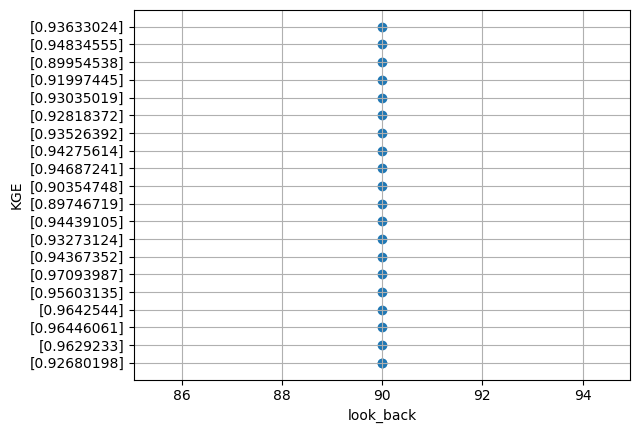

In [6]:
x='look_back'
y='KGE'

combined_df=combined_df.dropna()

# Scatter plot of two columns
plt.scatter( combined_df[  x],  combined_df[ y])
plt.xlabel( x)
plt.ylabel( y )
plt.title( '')
plt.grid(True)
plt.show()


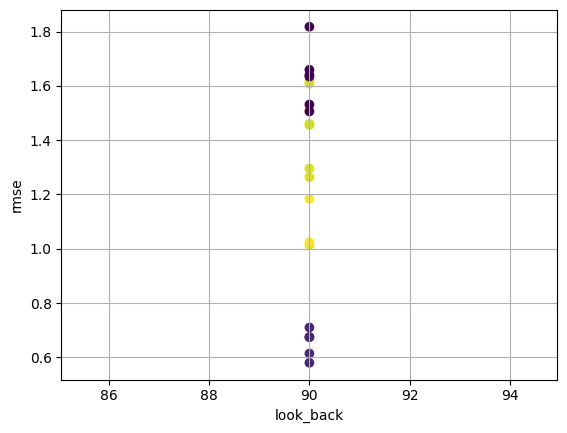

In [7]:
x='look_back'
y='rmse'

combined_df=combined_df.dropna()

# Scatter plot of two columns
plt.scatter( combined_df[  x],  combined_df[ y] , c= combined_df['model_site'] )
plt.xlabel( x)
plt.ylabel( y )
plt.title('' )
plt.grid(True)
plt.show()

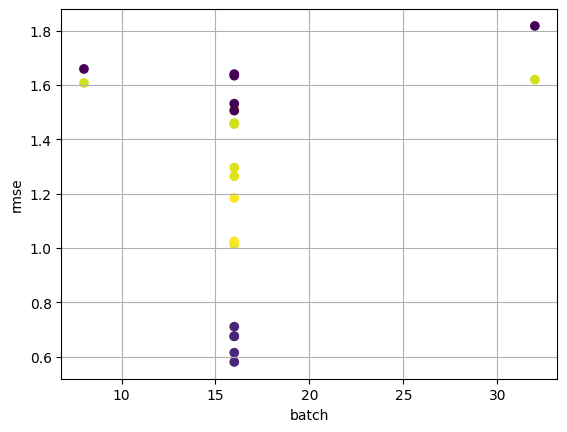

In [8]:
x='batch'
y='rmse'

combined_df=combined_df.dropna()

# Scatter plot of two columns
plt.scatter( combined_df[  x],  combined_df[ y] , c= combined_df['model_site'] )
plt.xlabel( x)
plt.ylabel( y )
plt.title('' )
plt.grid(True)
plt.show()